# Insper Jr. 

# Análise de Dados para R. Amaral Office
___

##### João Mattar e Livia Carvalho - Grupo 10

In [2]:
import pandas as pd
import os
import math
from statsmodels.tsa.seasonal import STL

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from numpy import arange




## LEITURA DA BASE DE DADOS

In [3]:
## print("Esperamos trabalhar no diretório")
print(os.getcwd())



/Users/liviacarvalho/Documents/Insper Junior/Trainee /Analise de dados/Analise-de-Dados-Jr.---Livia-e-Joao


In [4]:
filename = 'Base de Dados R. Amaral Office.xlsx'

if filename in os.listdir():
    print(f'Parece que o arquivo {filename} está na mesma pasta do notebook da avaliação, yay!\n')
    
else:
    print(f'Não encontrei o arquivo {filename}.\n'
          f'O notebook e os arquivos de dados desta avaliação devem ser salvos dentro da mesma pasta no seu computador.\n')
    

Parece que o arquivo Base de Dados R. Amaral Office.xlsx está na mesma pasta do notebook da avaliação, yay!



In [5]:
# Carregando os dados
df = pd.read_excel(filename)
df.head()

,id_pedido,nome_cliente,modo_envio,estado,vendas,quantidade,desconto,lucro,segmento,região,...,dia_pedido,dia_semana_pedido,mes_pedido,ano_pedido,dia_envio,mes_envio,ano_envio,data_pedido,mes_ano,tempo_preparacao
0,1,Muhammed MacIntyre,Expresso,Paraná,825.174,9,0.30,-117.8820,Corporativo,Sul,...,4,Domingo,9,2016,6,9,2016,42617,42617,2
1,2,Ruben Dartt,Normal,São Paulo,411.332,4,0.15,-4.8392,Consumidor,Sudeste,...,5,Sexta-feira,9,2014,9,9,2014,41887,41887,4
2,3,Liz Pelletier,Mesmo Dia,São Paulo,411.332,4,0.15,-4.8392,Home Office,Sudeste,...,28,Quinta-feira,11,2013,28,11,2013,41606,41606,0
3,4,Liz Pelletier,Expresso,Amapá,241.960,2,0.00,33.8744,Consumidor,Norte,...,30,Segunda-feira,5,2016,31,5,2016,42520,42520,1
4,5,Liz Pelletier,Normal,Sergipe,341.960,2,0.00,78.6508,Home Office,Nordeste,...,31,Terça-feira,12,2013,7,1,2014,41639,41639,7


## PREPARO DA BASE DE DADOS

In [6]:
type(df)
df.dtypes

id_pedido              int64
nome_cliente          object
modo_envio            object
estado                object
vendas               float64
quantidade             int64
desconto             float64
lucro                float64
segmento              object
região                object
subcategoria          object
categoria             object
dia_pedido             int64
dia_semana_pedido     object
mes_pedido             int64
ano_pedido             int64
dia_envio              int64
mes_envio              int64
ano_envio              int64
data_pedido            int64
mes_ano                int64
tempo_preparacao       int64
dtype: object



## 1. Análise Temporal
#### 1.1 Tendência de vendas ao longo do tempo (dia, semana, mês e ano)

Forecasting de vendas por categoria: use um modelo ARIMA ou Prophet para projetar demanda futura e ajustar estoques.

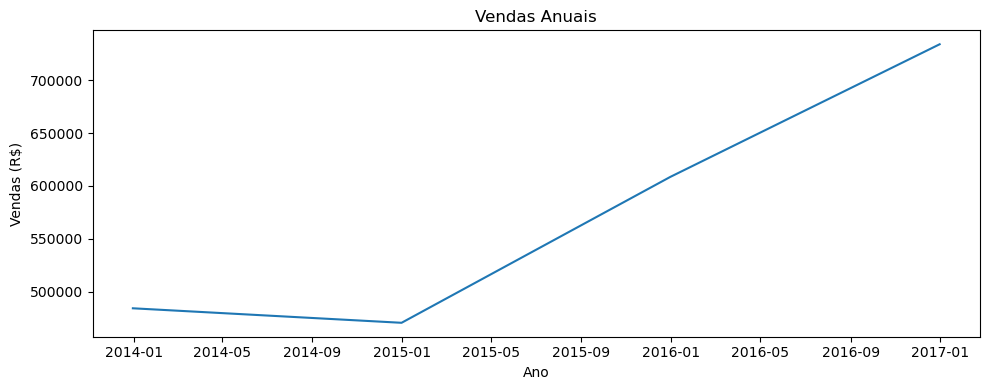

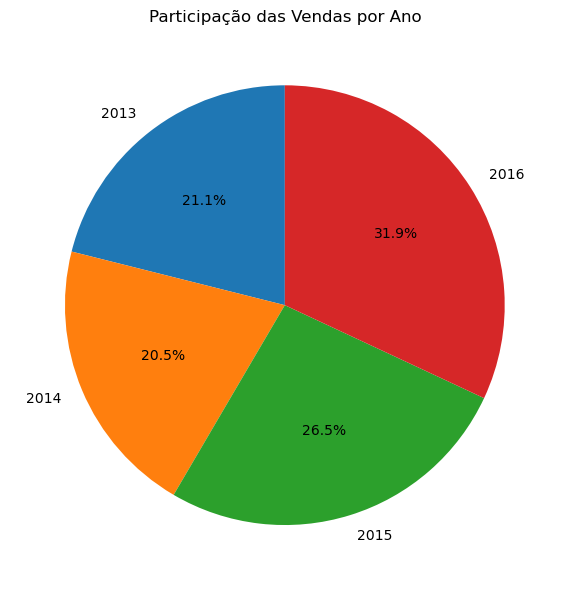

In [7]:
# Criando coluna com dia, mês e ano junto
df['data_pedido'] = pd.to_datetime(
    dict(year=df['ano_pedido'], month=df['mes_pedido'], day=df['dia_pedido'])
)
df = df.set_index('data_pedido').sort_index() #ele pega a coluna pedido_date (que contém datas) e passa a usá-la como índice e  após trocar o índice, esse comando ordena todas as linhas pelo próprio índice (ou seja, pelas datas), garantindo que as observações fiquem em ordem cronológica.

#Separando vendas em diárias, semanais, mensais e anuais
vendas_diarias = df['vendas'].resample('D').sum()
vendas_semanais = df['vendas'].resample('W-MON').sum()
vendas_mensais = df['vendas'].resample('M').sum()
vendas_anuais = df['vendas'].resample('Y').sum()

#ANALISE ANUAL
#Função para gerar gráfico das series
def plot_series(serie, title, xlabel):
    plt.figure(figsize=(10,4))
    plt.plot(serie.index, serie.values)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Vendas (R$)')
    plt.tight_layout()
    plt.show()

plot_series(vendas_anuais,    'Vendas Anuais',     'Ano')

# Gráfico Anual em Pizza 
plt.figure(figsize=(6,6))
# rótulos = ano como string
anos = vendas_anuais.index.year.astype(str)
valores = vendas_anuais.values

plt.pie(valores, labels=anos, autopct='%1.1f%%', startangle=90)
plt.title('Participação das Vendas por Ano')
plt.tight_layout()
plt.show()

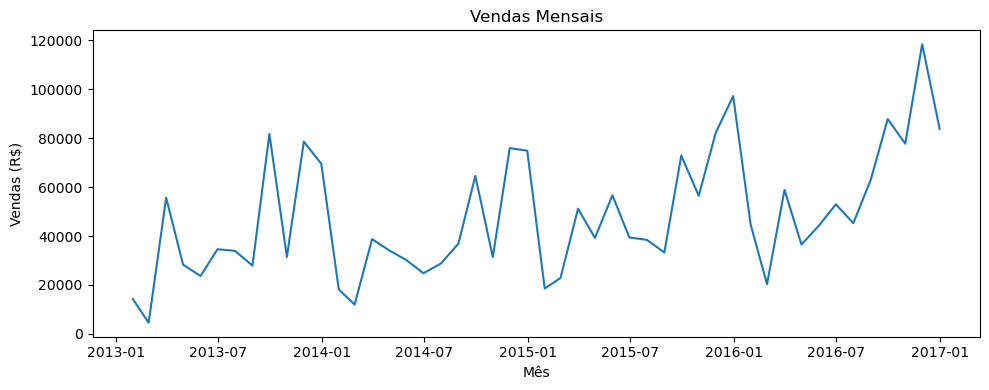

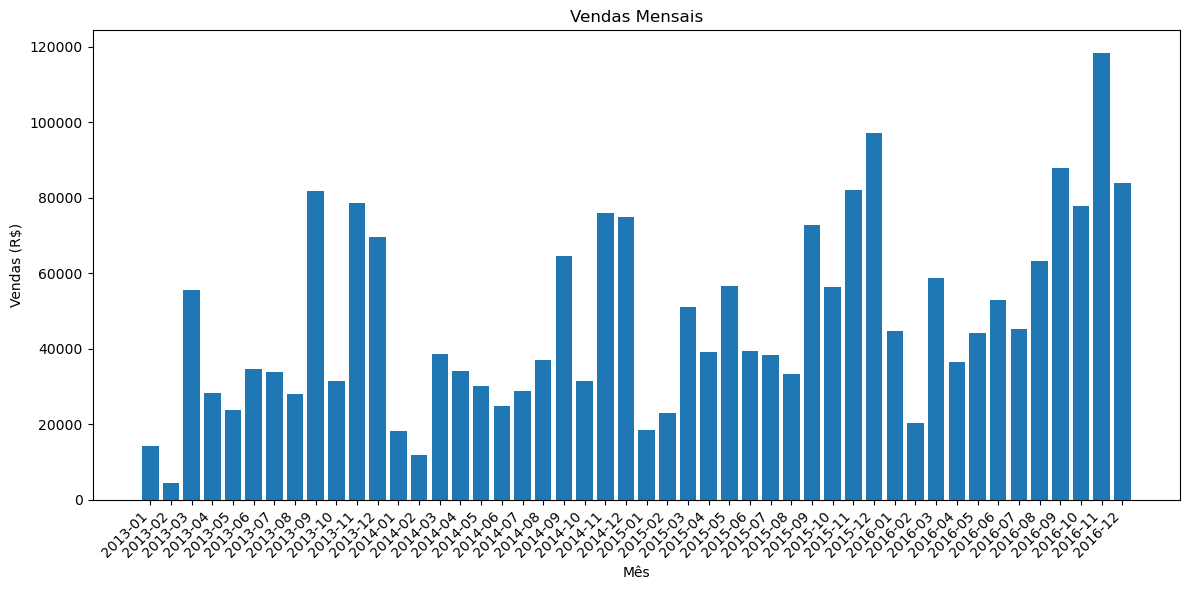

data_pedido,2013,2014,2015,2016
data_pedido,,,,
1,14236.8950,18174.0756,18542.4910,44703.1420
2,4519.8920,11951.4110,22867.7110,20301.1334
3,55691.0090,38726.2520,51186.2170,58872.3528
4,28295.3450,34195.2085,39248.5930,36521.5361
5,23648.2870,30131.6865,56691.0770,44261.1102
6,34595.1276,24797.2920,39430.4430,52981.7257
7,33946.3930,28765.3250,38440.7550,45264.4160
8,27909.4685,36898.3322,33265.5643,63120.8880
9,81777.3508,64595.9180,72908.1089,87866.6520


In [8]:
#ANALISE MENSAL
plot_series(vendas_mensais,   'Vendas Mensais',    'Mês') #nao ficou bom

# --- Gráfico Mensal em Colunas ---
plt.figure(figsize=(12,6))
# converte índice para string “YYYY-MM” para ficar no eixo x
meses = vendas_mensais.index.strftime('%Y-%m')
valores = vendas_mensais.values

plt.bar(meses, valores)
plt.title('Vendas Mensais')
plt.xlabel('Mês')
plt.ylabel('Vendas (R$)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#comparação ano a ano
tabela_mensal = df['vendas'].groupby(
    [df.index.year, df.index.month]
).sum().unstack(level=0)
display(tabela_mensal)

Última data no índice: 2016-12-30 00:00:00
Ano da última data: 2016


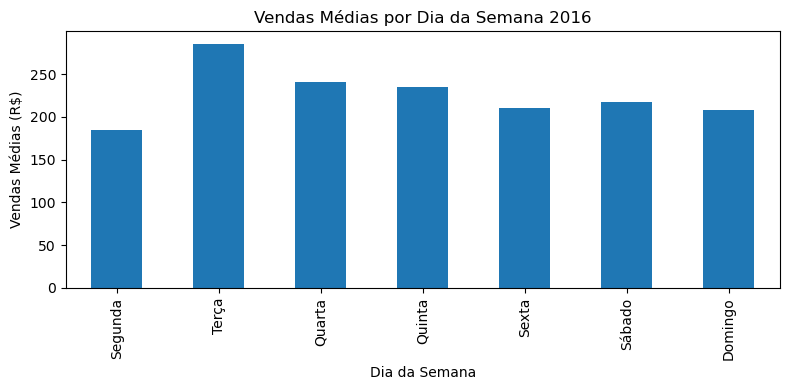

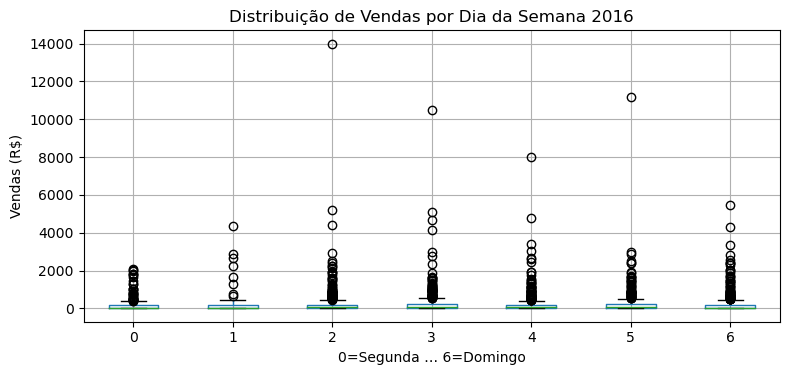

Segunda    184.514513
Terça      285.633160
Quarta     241.061315
Quinta     234.287714
Sexta      210.698726
Sábado     217.579923
Domingo    207.904461
Name: vendas, dtype: float64


In [9]:
#ANALISE SEMANAL - Apenas do ultimo ano da base de dados

ultima_data = df.index.max()
data_um_ano_atras = ultima_data - pd.DateOffset(years=1)
df_ultimo_ano = df.loc[df.index >= data_um_ano_atras].copy()

print("Última data no índice:", ultima_data)
print("Ano da última data:", ultima_data.year)

# extraindo o dia da semana como número (0=segunda … 6=domingo)
df_ultimo_ano['weekday'] = df_ultimo_ano.index.dayofweek

# média de vendas por dia da semana
media_por_dia = df_ultimo_ano.groupby('weekday')['vendas'].mean()

# renomeando para facilitar leitura
media_por_dia.index = ['Segunda','Terça','Quarta','Quinta','Sexta','Sábado','Domingo']

# e plot
media_por_dia.plot(kind='bar', figsize=(8,4))
plt.title('Vendas Médias por Dia da Semana 2016')
plt.xlabel('Dia da Semana')
plt.ylabel('Vendas Médias (R$)')
plt.tight_layout()
plt.show()

df_ultimo_ano.boxplot(column='vendas', by='weekday', figsize=(8,4))
plt.title('Distribuição de Vendas por Dia da Semana 2016')
plt.suptitle('')
plt.xlabel('0=Segunda … 6=Domingo')
plt.ylabel('Vendas (R$)')
plt.tight_layout()
plt.show()

print(media_por_dia)

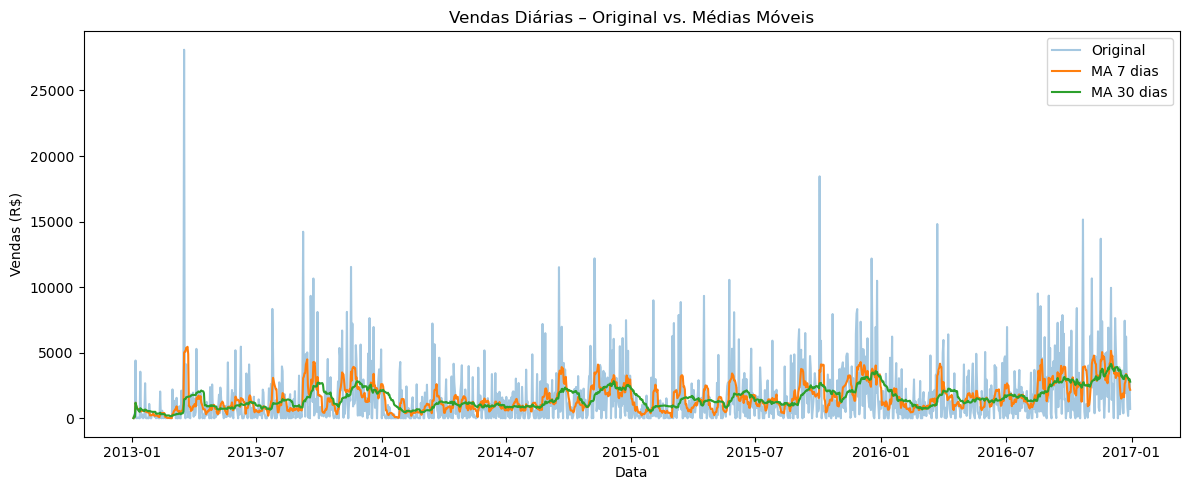

In [13]:
#ANALISE DIARIA

# --- 2. Plot da série original + médias móveis ---
# calcula médias móveis de 7 e 30 dias
ma7  = vendas_diarias.rolling(window=7,  min_periods=1).mean()
ma30 = vendas_diarias.rolling(window=30, min_periods=1).mean()

plt.figure(figsize=(12,5))
plt.plot(vendas_diarias, alpha=0.4, label='Original')
plt.plot(ma7,  label='MA 7 dias')
plt.plot(ma30, label='MA 30 dias')
plt.title('Vendas Diárias – Original vs. Médias Móveis')
plt.xlabel('Data')
plt.ylabel('Vendas (R$)')
plt.legend()
plt.tight_layout()
plt.show()


# # --- 3. Decomposição STL para evidenciar tendência e sazonalidade ---
# stl = STL(vendas_diarias, period=365)
# res = stl.fit()

# # STL já gera um subplot com Observed / Trend / Seasonal / Residual
# res.plot()
# plt.suptitle('Decomposição STL das Vendas Diárias', y=1.02)
# plt.tight_layout()
# plt.show()

ANALISE ANUAL: 
A empresa teve um crescimento acelerado desde o inicio de 2015 
- Vale mapear o que mudou neste ano para replicar o que deu certo. Após 2015, é essencial reforçar os canais e parceiros B2B que mais contribuíram para o crescimento, ajustando o mix de produtos e campanhas. Praticar marketing segmentado, com ofertas exclusivas para clientes de alto ticket e reengajamento de inativos

ANALISE MENSAL: 
Picos consistentes em novembro/dezembro, tais que impulsionam até 2x vendas médias de meses normais, em contraponto, janeiro e fevereiro tem uma queda forte (resquício do período de festas).
- Reforçar campanhas de Black Friday e Natal; Fazer promoções de “recuperação” em jan/fev para amenizar; Planejamento de estoque: antecipar pedidos de reposição em out/nov, assim  otimizar o estoque e evitar excessos nos meses mais fracos.

ANALISE SEMANAL: 
Como visto nos gráficos semanais terça é o dia que gera mais receita, mas os dias mais para o meio da semana como quarta e quinta não estão muito atrás, o boxplot por sua vez apresenta alguns outliers (como vendas diárias superiores a 10k) nesse periodo também. Segunda feira é o dia mais fraco com 35% menos receita que terça feira. 
- Concentrar campanhas as terças que é quando o publico está mais engajado e iniciaivas como descontos especiais as segundas feiras para suavizar o dia mais fraco.

#### 1.2 Relação com quantidade de pedidos

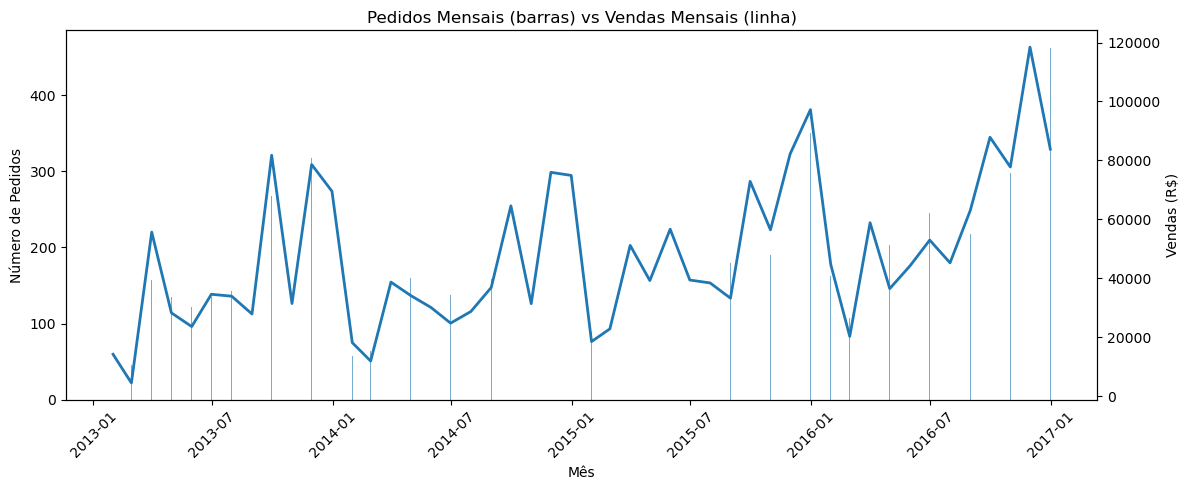

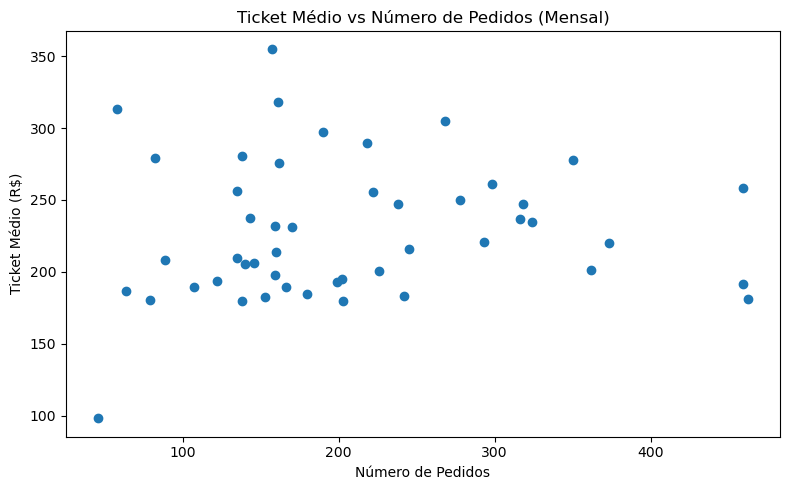

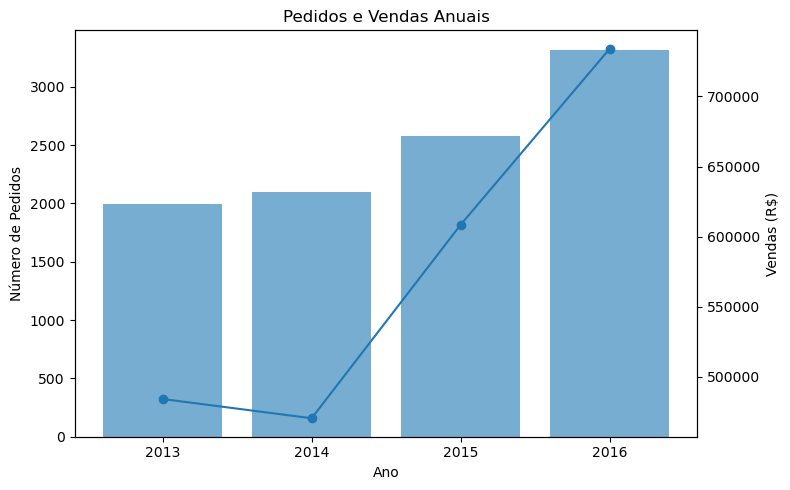

Correlação entre número de pedidos e vendas (mensal): 0.93


In [11]:
# 1. Contagem de pedidos nos mesmos períodos
# (supondo que cada linha de df represente um pedido distinto)

pedidos_diarios = df['id_pedido'].resample('D').count()
pedidos_mensais = df['id_pedido'].resample('M').count()
pedidos_anuais  = df['id_pedido'].resample('Y').count()

# 2. Ticket médio
ticket_medio_diario  = vendas_diarias / pedidos_diarios
ticket_medio_mensal  = vendas_mensais  / pedidos_mensais
ticket_medio_anual   = vendas_anuais   / pedidos_anuais

# 3. Gráfico mensal: barras de pedidos vs linha de vendas e ticket médio
fig, ax1 = plt.subplots(figsize=(12,5))

# barras para número de pedidos
ax1.bar(pedidos_mensais.index, pedidos_mensais.values, alpha=0.6)
ax1.set_ylabel('Número de Pedidos')
ax1.set_xlabel('Mês')
ax1.tick_params(axis='x', rotation=45)

# eixo secundário para vendas
ax2 = ax1.twinx()
ax2.plot(vendas_mensais.index, vendas_mensais.values, label='Vendas', linewidth=2)
ax2.set_ylabel('Vendas (R$)')

plt.title('Pedidos Mensais (barras) vs Vendas Mensais (linha)')
fig.tight_layout()
plt.show()

# 4. Scatter ticket médio vs número de pedidos (mensal)
plt.figure(figsize=(8,5))
plt.scatter(pedidos_mensais.values, ticket_medio_mensal.values)
plt.title('Ticket Médio vs Número de Pedidos (Mensal)')
plt.xlabel('Número de Pedidos')
plt.ylabel('Ticket Médio (R$)')
plt.tight_layout()
plt.show()

# 5. Mesmo para anual, se desejar
fig, ax3 = plt.subplots(figsize=(8,5))
ax3.bar(pedidos_anuais.index.year.astype(str), pedidos_anuais.values, alpha=0.6)
ax3.set_xlabel('Ano')
ax3.set_ylabel('Número de Pedidos')

ax4 = ax3.twinx()
ax4.plot(vendas_anuais.index.year.astype(str), vendas_anuais.values, marker='o')
ax4.set_ylabel('Vendas (R$)')

plt.title('Pedidos e Vendas Anuais')
plt.tight_layout()
plt.show()

# 6. Correlação rápida (mensal)
corr = pedidos_mensais.corr(vendas_mensais)
print(f"Correlação entre número de pedidos e vendas (mensal): {corr:.2f}")


In [12]:
# --- 1. Top 3 meses por receita ---
top3_receita = vendas_mensais.nlargest(3)
print("Top 3 meses por receita:")
print(top3_receita)

# --- 2. Top 3 meses por número de pedidos ---
pedidos_mensais = df['id_pedido'].resample('M').count()
top3_pedidos = pedidos_mensais.nlargest(3)
print("\nTop 3 meses por número de pedidos:")
print(top3_pedidos)

Top 3 meses por receita:
data_pedido
2016-11-30    118447.825
2015-12-31     97237.417
2016-09-30     87866.652
Name: vendas, dtype: float64

Top 3 meses por número de pedidos:
data_pedido
2016-12-31    462
2016-09-30    459
2016-11-30    459
Name: id_pedido, dtype: int64

No último ano:
 • Dia com mais receita: Quinta (R$ 143,618.37)
 • Dia com mais pedidos:  Domingo (647 pedidos)


A correlação mensal entre volume de pedidos e faturamento ficou em torno de 0,95 (muito alta), o que confirma que aumentar o número de pedidos é, de fato, o principal motor de crescimento de receita. Além disso os picos de pedidos e receita concentram-se no último trimestre do ano, reforçando a importância de Black Friday, Natal e promoções sazonais.

Ticket Médio x Volume
- O scatter mensal mostra que, embora meses com mais pedidos quase sempre tragam mais receita, o ticket médio varia de R$ 180 a R$ 350. - Ticket médio = valor médio gasto por cliente em cada pedido. Em outras palavras, indica quanto, em média, cada compra gera de receita para a empresa.

Para maximizar resultados, é preciso manter o foco no volume investindo em campanhas que gerem tráfego e pedidos, pois o impacto dos pedidos na receita é direto. Planejar promoções sazonais fortes em novembro/dezembro (Black Friday e Natal) como dito anteriormente - outro dado que reforça a analise anterior e implementar ações de “volta ao escritório” em janeiro/fevereiro para recuperar a queda pós-festas. Por fim, use a alta correlação entre pedidos e receita (≈0,95) para ajustar seu forecast (previsão de resultados futuros, neste caso: faturamento a partir de metas de volume) e antecipe o estoque para o quarto trimestre, evitando excessos (overstock) nos períodos mais lentos.